In [1]:
using BitInformation, PyPlot

In [55]:
N = 100_000
x = zeros(N)
y = zeros(N)

x[1] = randn()
y[1] = randn()

cx = 0.95
cy = 0.999

for i in 2:N
    x[i] = cx*x[i-1] + sqrt(1-cx^2)*randn()
    y[i] = cy*y[i-1] + sqrt(1-cy^2)*randn()
end

In [56]:
sub = 10
m = 1000

1000

In [57]:
hcat(bitinformation(x)[12:20], bitinformation(y)[12:20])

9×2 Matrix{Float64}:
 0.0245019   0.418562
 0.00156321  0.238263
 5.12068e-5  0.10001
 0.0         0.0195444
 0.0         0.000739945
 0.0         0.0
 0.0         0.0
 0.0         0.0
 0.0         0.0

In [58]:
hcat(bitinformation(x[1:sub:end])[12:20], bitinformation(y[1:sub:end])[12:20])

9×2 Matrix{Float64}:
 0.0  0.137732
 0.0  0.0348443
 0.0  0.00387452
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0

In [59]:
bitinformation(randn(N))[1:12]

12-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

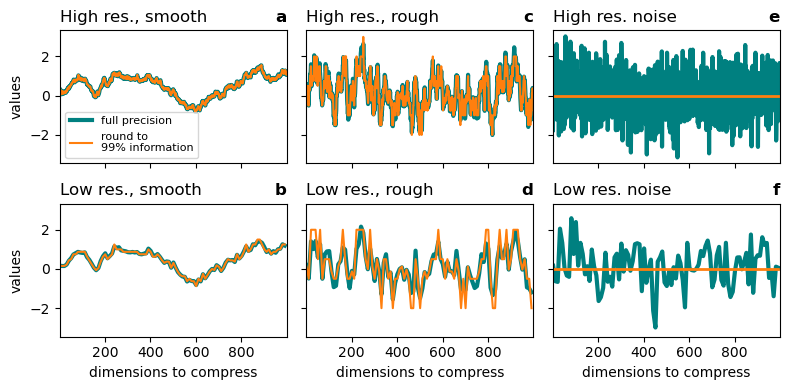

In [61]:
fig,axs = subplots(2,3,sharex=true,sharey=true,figsize=(8,4)) 

c = "teal"

axs[1,3].plot(randn(m),c,lw=3)
axs[1,2].plot(x[1:m],c,lw=3)
axs[1,1].plot(y[1:m],c,lw=3,label="full precision")

axs[2,3].plot(1:sub:m,randn(m÷sub),c,lw=3)
axs[2,2].plot(1:sub:m,x[1:sub:m],c,lw=3)
axs[2,1].plot(1:sub:m,y[1:sub:m],c,lw=3)

axs[1,3].plot(round(randn(m),-11),"C1",lw=2)
axs[1,2].plot(round(x[1:m],1),"C1")
axs[1,1].plot(round(y[1:m],4),"C1",label="round to\n99% information")

axs[2,3].plot(1:sub:m,round(randn(m÷sub),-11),"C1",lw=2)
axs[2,2].plot(1:sub:m,round(x[1:sub:m],-1),"C1")
axs[2,1].plot(1:sub:m,round(y[1:sub:m],2),"C1")

axs[1,3].set_title("High res. noise",loc="left")
axs[1,2].set_title("High res., rough",loc="left")
axs[1,1].set_title("High res., smooth",loc="left")

axs[2,3].set_title("Low res. noise",loc="left")
axs[2,2].set_title("Low res., rough",loc="left")
axs[2,1].set_title("Low res., smooth",loc="left")

for (iax,ax) in enumerate(axs)
    ax.set_title(string(Char(iax+96)),loc="right",fontweight="bold")
end

for ax in axs[2,:]
    ax.set_xlabel("dimensions to compress")
end

for ax in axs[:,1]
    ax.set_ylabel("values")
    ax.set_yticks([-2,0,2])
end

axs[1,1].legend(loc=3,fontsize=8)
axs[1,1].set_xlim(1,m-1)

tight_layout()